# Problem Statement
#### - In the fast paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness.
#### - Our goal is to use data-driven to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.
# Research Question
### - Is there a relationship between total fare amount and payment types?
### - Nudge customer towards payment methhods that generate higher revenue for drivers, without negatively impacting customer experience

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\Python\Data\Yellow_TripdataProject\yellow_tripdata_2020-01.csv') #Importing data set
df.head() #shows top 5 rows

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [4]:
df.shape #Shows shape of the data set

(6405008, 18)

In [5]:
df.info() #Provide information about data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 879.6+ MB


"tpep_pickup_datetime" & "tpep_dropoff_datetime" data type is objects, they should be datetime data type 

In [6]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime']) #Converting data type object to datetime
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime']) #Converting data type object to datetime

In [7]:
df.dtypes #checking data types 

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [8]:
df['trip_durtation'] = df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'] #Extracting durations
df['trip_durtation'] = df['trip_durtation'].dt.total_seconds()/60 #converting seconds to minutes

In [9]:
df.head() #shows top 5 rows

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_durtation
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000


### Selecting data as per prolem statement

In [10]:
df = df[['passenger_count','payment_type','fare_amount','trip_distance','trip_durtation']] 

In [11]:
df.sample() #shows one random row as a sample

,passenger_count,payment_type,fare_amount,trip_distance,trip_durtation
4746092,2.0,1.0,5.5,0.9,5.066667


In [12]:
df.isnull().sum() #Checking null values

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
trip_durtation         0
dtype: int64

In [13]:
len(df) #shows length of the data

6405008

In [14]:
def per(x): #Creating the fucntion to check percentage of values which are empty
    return (x/len(df))*100

In [15]:
passenger_count = 65441
payment_type = 65441
print('Percentage of passenger_count:-',per(passenger_count))
print()
print('Percentage of payment_type:-',per(payment_type))

Percentage of passenger_count:- 1.021716132126611

Percentage of payment_type:- 1.021716132126611


### 1.02% null values, which is very less, they can either be dorpped or filled with mean or median 

In [16]:
df.dropna(inplace=True) #Droping null values
df.isnull().sum()

passenger_count    0
payment_type       0
fare_amount        0
trip_distance      0
trip_durtation     0
dtype: int64

In [17]:
df.sample(3)

,passenger_count,payment_type,fare_amount,trip_distance,trip_durtation
3067164,1.0,1.0,11.0,1.50,16.000000
898803,6.0,1.0,5.5,0.75,5.066667
4477595,1.0,1.0,13.5,2.10,19.483333


In [18]:
df.dtypes

passenger_count    float64
payment_type       float64
fare_amount        float64
trip_distance      float64
trip_durtation     float64
dtype: object

In [19]:
df['passenger_count'] = df['passenger_count'].astype(int) #Convering float to integer
df['payment_type'] = df['payment_type'].astype(int) #Convering float to integer

In [20]:
df.head() #shows top 5 rows

,passenger_count,payment_type,fare_amount,trip_distance,trip_durtation
0,1,1,6.0,1.2,4.800000
1,1,1,7.0,1.2,7.416667
2,1,1,6.0,0.6,6.183333
3,1,1,5.5,0.8,4.850000
4,1,2,3.5,0.0,2.300000


In [21]:
df.duplicated().sum() #Checking duplicates values

3331706

In [22]:
df.drop_duplicates(inplace=True) #Dropping duplicates values

In [23]:
df.duplicated().sum()#Checking duplicates values

0

In [24]:
df.shape #Show shape of the data set

(3007861, 5)

In [25]:
df['passenger_count'].value_counts(normalize=True) #shows values by its perentage

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [26]:
df['payment_type'].value_counts(normalize=True) #shows values by its perentage
#1- Credit Card
#2- Cash
#3- No Charge
#4- Dispute
#5- Unkown
#6- Voided Trip

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

In [27]:
df = df[df['payment_type'].isin([1,2])] #Selecting data as per problem statement
df = df[df['passenger_count'].isin([1,2,3,4,5])] #Selecting data as per problem statement
df

,passenger_count,payment_type,fare_amount,trip_distance,trip_durtation
0,1,1,6.0,1.20,4.800000
1,1,1,7.0,1.20,7.416667
2,1,1,6.0,0.60,6.183333
3,1,1,5.5,0.80,4.850000
4,1,2,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,1,10.0,2.09,14.800000
6339561,1,1,17.5,4.11,21.500000
6339563,1,1,13.0,2.13,19.000000
6339564,1,1,12.5,2.55,16.283333


In [28]:
df['payment_type'].value_counts()
#1-credit card
#2-Cash

payment_type
1    1907801
2     872482
Name: count, dtype: int64

In [29]:
#Creating function to replacing 1 with "Card" & 2 with "Cash"
def chang(x): 
    if x ==1:
        return 'Card'
    else:
        return 'Cash'

In [30]:
df['payment_type'] = df['payment_type'].apply(chang) #Replacing Values in payment_type columns

In [31]:
df.sample(8) #Show 8 random samples

,passenger_count,payment_type,fare_amount,trip_distance,trip_durtation
2518400,1,Card,26.5,8.73,25.433333
3641180,1,Card,10.5,2.39,10.766667
2490840,1,Card,15.5,3.81,19.283333
4358717,1,Card,14.5,2.76,20.133333
416256,1,Cash,34.5,10.70,37.233333
1615897,1,Card,9.5,1.32,13.683333
4612199,1,Card,13.0,3.78,13.500000
2118602,2,Card,6.0,1.07,5.200000


In [32]:
df.describe() #Shows descriptive values

,passenger_count,fare_amount,trip_distance,trip_durtation
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


#### "fare_amount", "trip_distance" & "trip_durtation" can not be negative & columns are having outliers

In [33]:
df = df[df['fare_amount']>0] #Removing negative values
df = df[df['trip_distance']>0] #Removing negative values
df = df[df['trip_durtation']>0] #Removing negative values

In [34]:
df.describe()

,passenger_count,fare_amount,trip_distance,trip_durtation
count,2.748932e+06,2.748932e+06,2.748932e+06,2.748932e+06
mean,1.738151e+00,1.766835e+01,4.583313e+00,2.418261e+01
std,1.179440e+00,1.447531e+01,4.897806e+00,9.272285e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,9.000000e+00,1.530000e+00,9.950000e+00
50%,1.000000e+00,1.300000e+01,2.770000e+00,1.575000e+01
75%,2.000000e+00,2.100000e+01,5.500000e+00,2.333333e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [35]:
q1 = np.percentile(df['fare_amount'],25)
q1

9.0

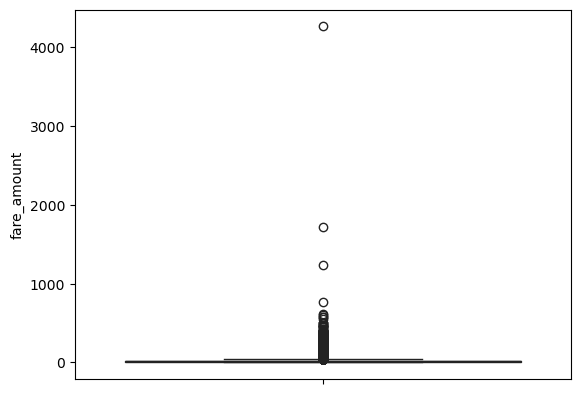

In [36]:
sns.boxplot(df['fare_amount'], color='#1D3557') #Checking Outliers
plt.show()

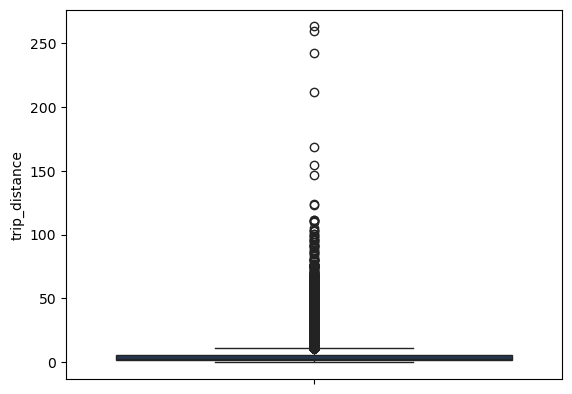

In [37]:
sns.boxplot(df['trip_distance'], color='#1D3557') #Checking Outliers
plt.show()

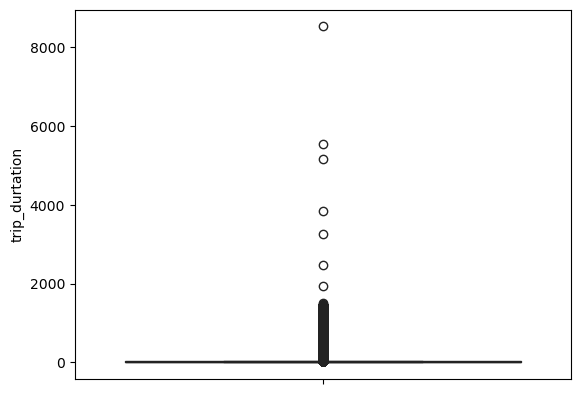

In [38]:
sns.boxplot(df['trip_durtation'],color='#1D3557')#Checking Outliers
plt.show()

### Removing Outliers

In [39]:
#Creating function to remove outliers
for i in ['fare_amount','trip_distance','trip_durtation']:
    q3 = np.percentile(df[i],75)
    q1 = np.percentile(df[i],25)
    IQR = q3-q1
    upper_bound = q3 + 1.5*IQR
    lower_bound = q1 - 1.5*IQR
    df = df[(df[i]<=upper_bound) & (df[i]>=lower_bound)]

In [40]:
df.describe()

,passenger_count,fare_amount,trip_distance,trip_durtation
count,2.297908e+06,2.297908e+06,2.297908e+06,2.297908e+06
mean,1.788903e+00,1.266990e+01,2.864790e+00,1.465181e+01
std,1.211896e+00,5.807998e+00,1.975755e+00,7.315283e+00
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,8.000000e+00,1.380000e+00,9.050000e+00
50%,1.000000e+00,1.150000e+01,2.330000e+00,1.391667e+01
75%,2.000000e+00,1.650000e+01,3.830000e+00,1.946667e+01
max,5.000000e+00,3.900000e+01,8.970000e+00,3.598333e+01


In [64]:
df

,passenger_count,payment_type,fare_amount,trip_distance,trip_durtation
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


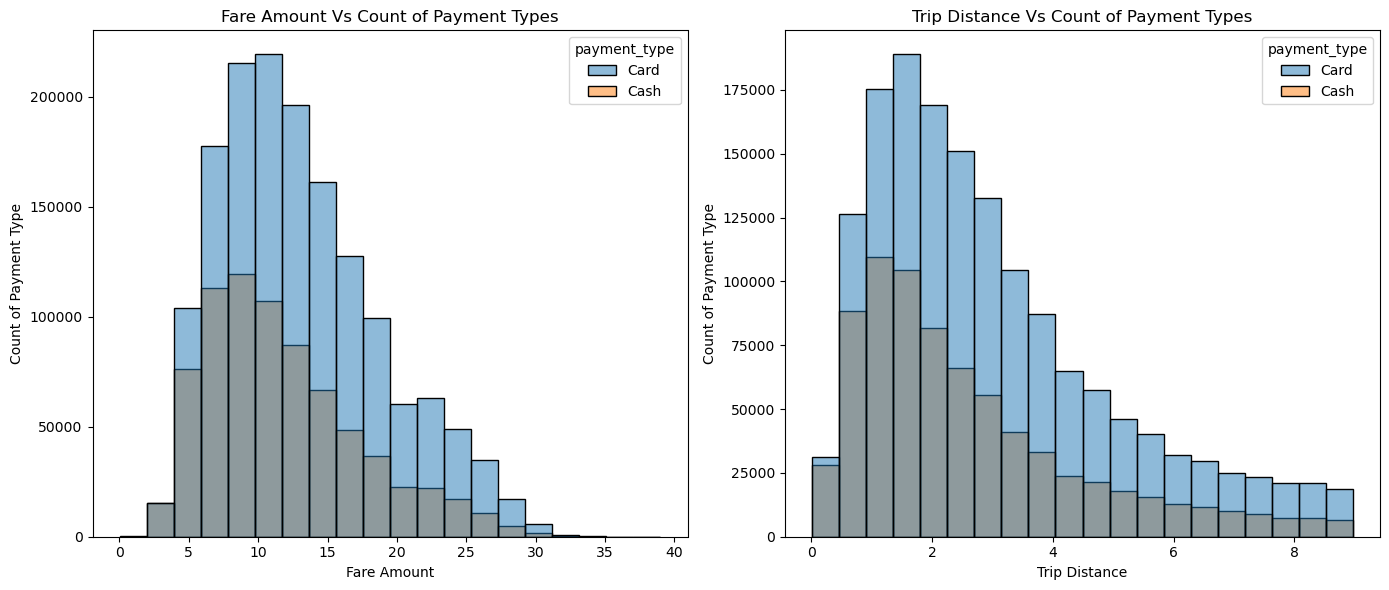

In [115]:

# Set up the figure with two columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot the first histogram in the first column
sns.histplot(data=df, x='fare_amount', hue='payment_type', bins=20, ax=axes[0])
axes[0].set_title('Fare Amount Vs Count of Payment Types')
axes[0].set_xlabel('Fare Amount')
axes[0].set_ylabel('Count of Payment Type')

# Plot the second histogram in the second column
sns.histplot(data=df, x='trip_distance', hue='payment_type', bins=20, ax=axes[1])
axes[1].set_title('Trip Distance Vs Count of Payment Types')
axes[1].set_xlabel('Trip Distance')
axes[1].set_ylabel('Count of Payment Type')

# Display the plots
plt.tight_layout()
plt.show()


#### custmers are more likely to pay by card as compare to cash
#### Customers are more likely to pay card than cash as distance is increasing

In [117]:
#Checking mean and standard deviation to Card and Cash payment
df.groupby('payment_type')[['fare_amount','trip_distance']].agg(['mean', 'std'])

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Card           13.112493  5.849281      2.992237  1.99274
Cash           11.758005  5.613038      2.602207  1.91372

In [118]:
r5 = df['payment_type'].value_counts() #Shows count of values
r5

payment_type
Card    1547039
Cash     750869
Name: count, dtype: int64

### Creating Pie Chart

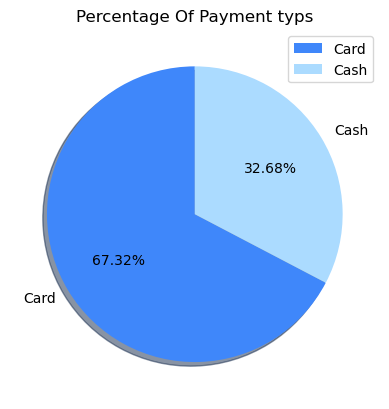

In [119]:
plt.pie(r5.values,autopct='%.2f%%', labels = r5.index, shadow=True, colors = ['#3F87FA','#ABDBFF'], startangle=90) #Creating Pie chart
plt.title('Percentage Of Payment typs') #Shows titile of the graph
plt.legend() #Shows label of the graph
plt.show()

#### Percentage of card payment is more that cash payment

In [143]:
r6 = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
r6.rename(columns={'passenger_count':'count'}, inplace=True)
r6.reset_index(inplace=True)
r6

,payment_type,passenger_count,count
0,Card,1,909245
1,Card,2,327661
2,Card,3,122412
3,Card,4,63676
4,Card,5,124045
5,Cash,1,460550
6,Cash,2,155472
7,Cash,3,54506
8,Cash,4,32715
9,Cash,5,47626


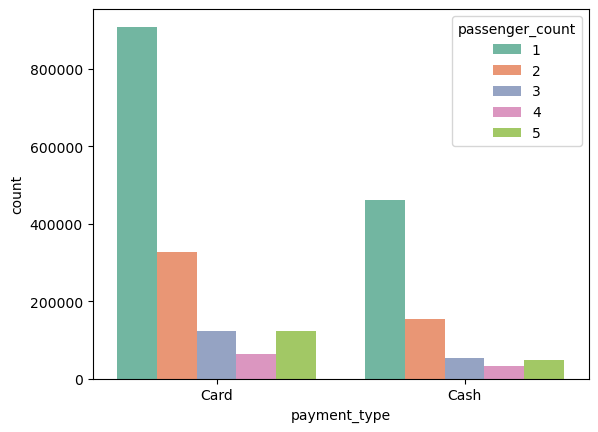

In [162]:
sns.barplot(data=r6, x='payment_type', y='count', hue='passenger_count', palette='Set2')
plt.show()


#### In passenger count customers perfering paying by card than cash